# Iris Feature Selection

In [1]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np


### Import the data and split it in train and test sets
Random noise is added to simulate useless variables


In [2]:
data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

X = np.hstack((X, noise))
X.shape

(150, 14)

### Split the training and test data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Define the GAFeatureSelectionCV options


In [4]:
clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

### Fit the model and see some results

In [5]:
evolved_estimator.fit(X, y)
features = evolved_estimator.best_features_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test[:, features])
accuracy = accuracy_score(y_test, y_predict_ga)

INSTANCE
True
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.558444	0.155441   	0.893333   	0.253333   
1  	54    	0.659333	0.132948   	0.893333   	0.333333   
2  	54    	0.742667	0.0867111  	0.893333   	0.586667   
3  	55    	0.805778	0.0740117  	0.893333   	0.653333   
4  	52    	0.873333	0.0435125  	0.906667   	0.746667   
5  	53    	0.896222	0.00659592 	0.913333   	0.893333   
6  	55    	0.901111	0.0131186  	0.953333   	0.893333   
7  	54    	0.911778	0.0206332  	0.953333   	0.893333   
8  	50    	0.926444	0.0210455  	0.953333   	0.893333   
9  	51    	0.941333	0.020177   	0.966667   	0.913333   
10 	49    	0.955556	0.00978787 	0.966667   	0.913333   
11 	55    	0.959111	0.00660714 	0.966667   	0.953333   
12 	57    	0.965333	0.004      	0.966667   	0.953333   
13 	55    	0.966444	0.00271257 	0.973333   	0.953333   
14 	58    	0.966667	6.66134e-16	0.966667   	0.966667   
15 	53    	0.966889	0.0011967  	0.973333   	0.966667   
16 	56    	0.967556	0.00226623 	0.

In [6]:
print(evolved_estimator.best_features_)
print("accuracy score: ", "{:.2f}".format(accuracy))

[ True  True  True  True False False False False False False False False
 False False]
accuracy score:  0.98


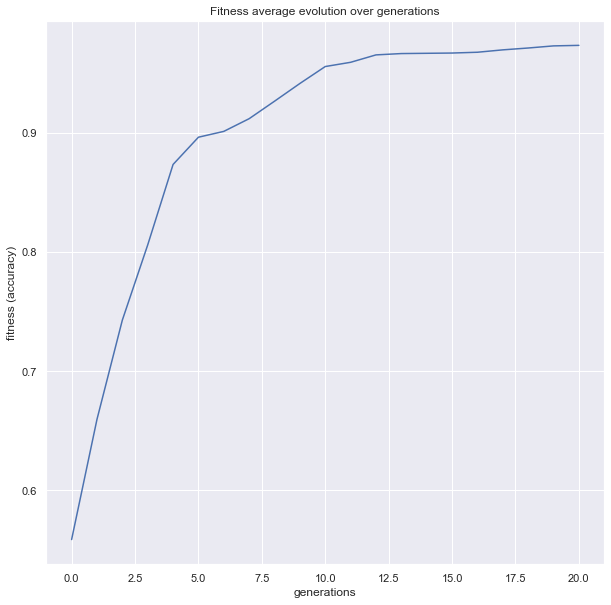

In [7]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()
